Context
I was looking for an unused and interesting dataset to improve my data science skills on when my professor mentioned the Sloan Digital Sky Survey which offers public data of space observations. As I found the data to be super insightful I want to share the data.

Content
The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.



Dataset available



https://raw.githubusercontent.com/dsrscientist/dataset1/master/Skyserver.csv



Feature Description
The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

To ease your start with the data you can read the feature descriptions below:

View "PhotoObj"
objid = Object Identifier
ra = J2000 Right Ascension (r-band)
dec = J2000 Declination (r-band)
Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

Source: https://en.wikipedia.org/wiki/Right_ascension

u = better of DeV/Exp magnitude fit
g = better of DeV/Exp magnitude fit
r = better of DeV/Exp magnitude fit
i = better of DeV/Exp magnitude fit
z = better of DeV/Exp magnitude fit
The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further education: https://www.astro.umd.edu/~ssm/ASTR620/mags.html

run = Run Number
rereun = Rerun Number
camcol = Camera column
field = Field number
Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

run number, which identifies the specific scan,
the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
An additional number, rerun, specifies how the image was processed.
View "SpecObj"
specobjid = Object Identifier
class = object class (galaxy, star or quasar object)
The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

redshift = Final Redshift
plate = plate number
mjd = MJD of observation
fiberid = fiber ID
In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.

Further information on SDSS images and their attributes:

http://www.sdss3.org/dr9/imaging/imaging_basics.php

http://www.sdss3.org/dr8/glossary.php

Acknowledgements
The data released by the SDSS is under public domain. Its taken from the current data release RD14.

More information about the license:

http://www.sdss.org/science/image-gallery/

It was acquired by querying the CasJobs database which contains all data published by the SDSS.

The exact query can be found at:

http://skyserver.sdss.org/CasJobs/ (Free account is required!)

There are also other ways to get data from the SDSS catalogue. They can be found under:

http://www.sdss.org/dr14/

They really have a huge database which offers the possibility of creating all kinds of tables with respect to personal interests.

Please don't hesitate to contact me regarding any questions or improvement suggestions. :-)

Inspiration
The dataset offers plenty of information about space to explore. Also the class column is the perfect target for classification practices!

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [59]:
#loading dataset
SpaceServer= pd.read_excel('Space Server.xlsx')
avacado.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237650000000000000,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3722360000000000000,STAR,-0.000009,3306,54922,491
1,1237650000000000000,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,363814000000000000,STAR,-0.000055,323,51615,541
2,1237650000000000000,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,323274000000000000,GALAXY,0.123111,287,52023,513
3,1237650000000000000,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3722370000000000000,STAR,-0.000111,3306,54922,510
4,1237650000000000000,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3722370000000000000,STAR,0.000590,3306,54922,512


In [60]:
SpaceServer.shape
SpaceServer.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [61]:
SpaceServer.dtypes

objid          int64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid     uint64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [62]:
SpaceServer.drop(['objid','ra','dec','u','g','r','i','z','run','rerun','camcol','field','specobjid'], inplace=True,axis=1)
SpaceServer.head()

,class,redshift,plate,mjd,fiberid
0,STAR,-0.000009,3306,54922,491
1,STAR,-0.000055,323,51615,541
2,GALAXY,0.123111,287,52023,513
3,STAR,-0.000111,3306,54922,510
4,STAR,0.000590,3306,54922,512


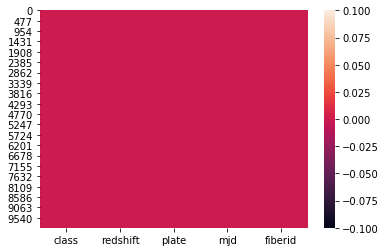

In [63]:
sns.heatmap(SpaceServer.isnull())

In [64]:
SpaceServer.describe()

,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.143726,1460.986400,52943.533300,353.069400
std,0.388774,1788.778371,1511.150651,206.298149
min,-0.004136,266.000000,51578.000000,1.000000
25%,0.000081,301.000000,51900.000000,186.750000
50%,0.042591,441.000000,51997.000000,351.000000
75%,0.092579,2559.000000,54468.000000,510.000000
max,5.353854,8410.000000,57481.000000,1000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EA2F788>,
      dtype=object)

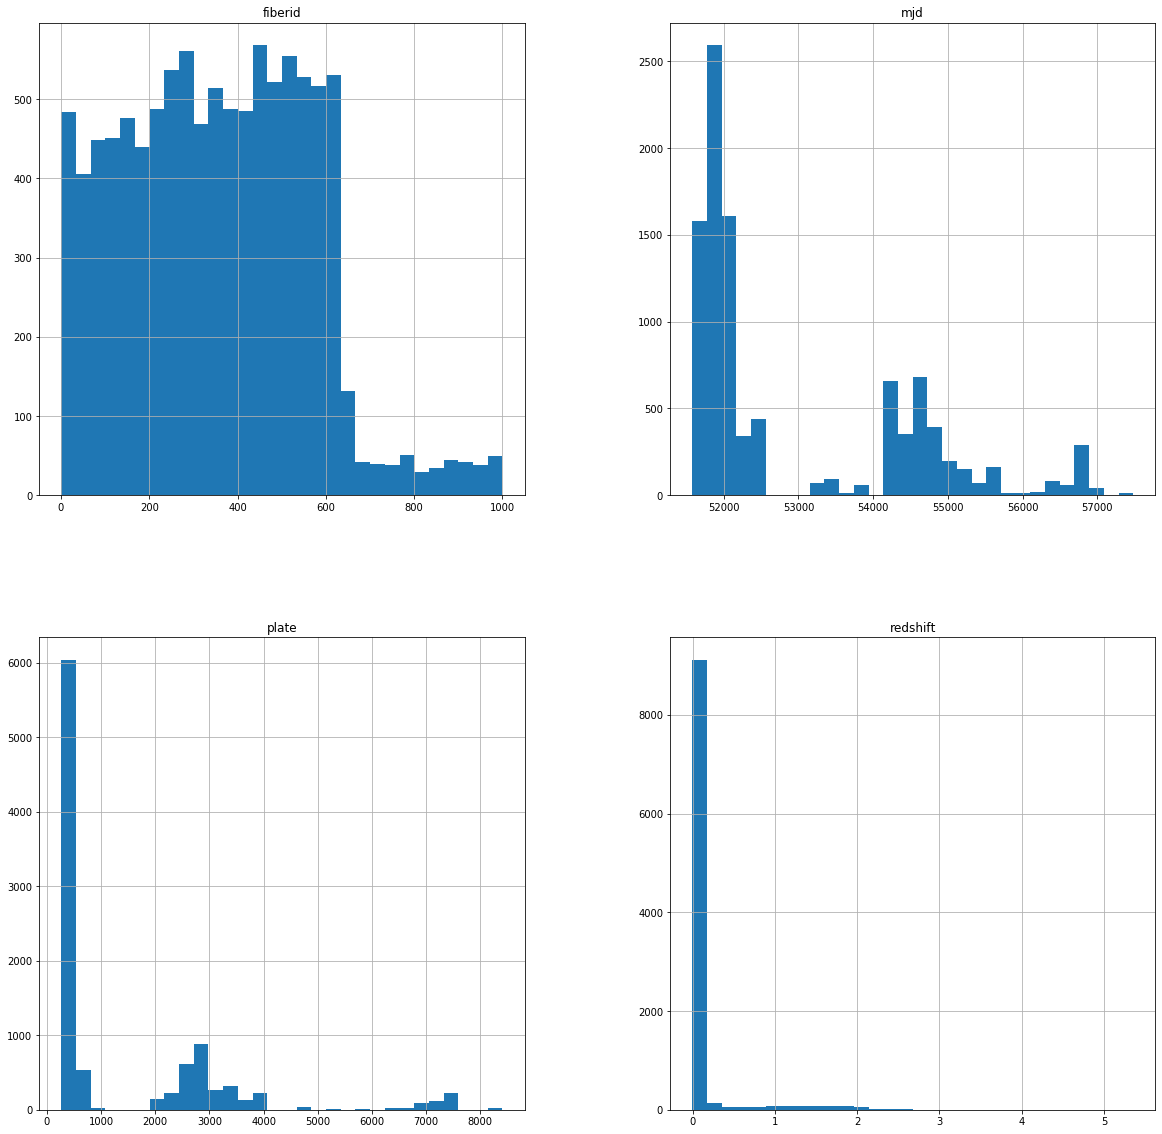

In [65]:
SpaceServer.hist(figsize=(20,20),grid=True,layout=(2,2),bins=30)

In [66]:
SpaceServer.skew()

redshift    4.265729
plate       1.794609
mjd         1.039610
fiberid     0.308053
dtype: float64

In [67]:
skew=('redshift','plate','mjd','fiberid')
for col in skew:
    if SpaceServer.skew().loc[col]>0.55:
         SpaceServer[col]=np.log1p( SpaceServer[col])

In [68]:
SpaceServer.skew()

redshift    3.513844
plate       0.696680
mjd         1.011097
fiberid     0.308053
dtype: float64

In [69]:
le= LabelEncoder()
SpaceServer['class'] = le.fit_transform(SpaceServer['class'])
SpaceServer

,class,redshift,plate,mjd,fiberid
0,2,-0.000009,8.103797,10.913687,491
1,2,-0.000055,5.780744,10.851587,541
2,0,0.116103,5.662960,10.859460,513
3,2,-0.000111,8.103797,10.913687,510
4,2,0.000590,8.103797,10.913687,512
...,...,...,...,...,...
9995,0,0.027209,6.104793,10.856650,246
9996,0,0.111338,6.104793,10.856650,228
9997,2,-0.000402,8.896177,10.951052,622
9998,0,0.013922,6.104793,10.856650,229


In [70]:
z=np.abs(zscore(SpaceServer))

In [71]:
threshhold=3
print(np.where(z>3))

(array([  17,   45,  109,  129,  135,  156,  160,  199,  243,  259,  260,
        281,  291,  301,  306,  308,  333,  433,  434,  435,  466,  477,
        494,  533,  562,  597,  612,  664,  743,  744,  749,  751,  760,
        774,  824,  833,  839,  898,  902,  905,  926,  927,  928,  931,
        941,  973,  974,  984, 1044, 1054, 1055, 1076, 1081, 1105, 1115,
       1145, 1152, 1156, 1169, 1179, 1186, 1187, 1191, 1193, 1201, 1241,
       1309, 1318, 1373, 1457, 1469, 1495, 1514, 1521, 1534, 1537, 1559,
       1579, 1605, 1621, 1629, 1656, 1710, 1728, 1736, 1741, 1832, 1839,
       1847, 1876, 1905, 1962, 2064, 2096, 2115, 2136, 2166, 2247, 2280,
       2301, 2313, 2319, 2413, 2431, 2491, 2492, 2498, 2533, 2543, 2559,
       2568, 2598, 2615, 2620, 2626, 2627, 2635, 2690, 2701, 2704, 2757,
       2799, 2803, 2804, 2808, 2817, 2819, 2832, 2852, 2856, 2884, 2893,
       2897, 2906, 2907, 2944, 2960, 2965, 2970, 2976, 2997, 3028, 3029,
       3086, 3093, 3098, 3116, 3135, 3141, 3142, 3

In [72]:
SpaceServer_new=SpaceServer[(z<3).all(axis=1)]

In [73]:
print(SpaceServer.shape,'\t',SpaceServer_new.shape)

(10000, 5) 	 (9497, 5)


[]

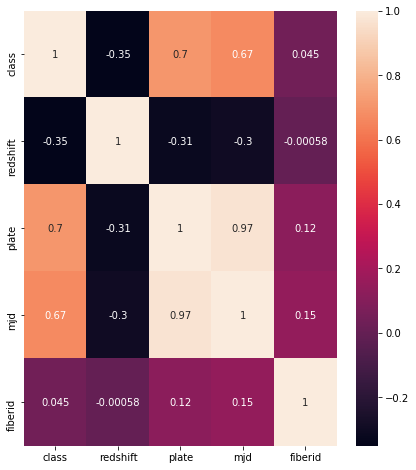

In [74]:
SpaceServer_cor=SpaceServer_new.corr()
plt.figure(figsize=(7,8))
sns.heatmap(SpaceServer_cor,annot=True)
plt.plot()

In [75]:
SpaceServer_new

,class,redshift,plate,mjd,fiberid
0,2,-0.000009,8.103797,10.913687,491
1,2,-0.000055,5.780744,10.851587,541
2,0,0.116103,5.662960,10.859460,513
3,2,-0.000111,8.103797,10.913687,510
4,2,0.000590,8.103797,10.913687,512
...,...,...,...,...,...
9995,0,0.027209,6.104793,10.856650,246
9996,0,0.111338,6.104793,10.856650,228
9997,2,-0.000402,8.896177,10.951052,622
9998,0,0.013922,6.104793,10.856650,229


In [76]:
x=SpaceServer.iloc[:,1:4].values
y=SpaceServer.iloc[:,0].values

In [77]:
model = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(kernel = 'rbf', random_state = 0),GaussianNB(),RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)]
max_accuracy_score=0
for r_state in range(80,90):
    x_train , x_test , y_train, y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    for i_c in model:
        i_c.fit(x_train,y_train)
        pre_c=i_c.predict(x_test)
        ac_score=accuracy_score(y_test,pre_c)
        print ("accuracy score correspond to random state " ,r_state,'is',ac_score)
        if ac_score>max_accuracy_score:
            max_accuracy_score=ac_score
            final_state=r_state
            final_model=i_c

print()
print()
print()
print()

print('max accuracy score correspond to random state',final_state,'is',max_accuracy_score,'and model is',final_model)

accuracy score correspond to random state  80 is 0.9755
accuracy score correspond to random state  80 is 0.98
accuracy score correspond to random state  80 is 0.9875
accuracy score correspond to random state  80 is 0.979
accuracy score correspond to random state  80 is 0.9735
accuracy score correspond to random state  80 is 0.985
accuracy score correspond to random state  81 is 0.976
accuracy score correspond to random state  81 is 0.981
accuracy score correspond to random state  81 is 0.982
accuracy score correspond to random state  81 is 0.98
accuracy score correspond to random state  81 is 0.9735
accuracy score correspond to random state  81 is 0.9855
accuracy score correspond to random state  82 is 0.981
accuracy score correspond to random state  82 is 0.9815
accuracy score correspond to random state  82 is 0.9795
accuracy score correspond to random state  82 is 0.982
accuracy score correspond to random state  82 is 0.9765
accuracy score correspond to random state  82 is 0.9845
acc

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=83,test_size=0.20)
KNN=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
KNN.fit(x_train,y_train)
predictionregion=KNN.predict(x_test)
auc_score=accuracy_score(y_test,predictionregion)
print('Accuracy Score:',auc_score*100)

Accuracy Score: 98.35000000000001


In [79]:
print ('Mean Absolute Error: ',mean_absolute_error(test_y,prediction))
print ('Mean Squared Error: ',mean_squared_error(test_y,prediction))
print ('Root Mean Absolute Error: ',np.sqrt(mean_absolute_error(test_y,prediction)))

Mean Absolute Error:  0.034
Mean Squared Error:  0.053
Root Mean Absolute Error:  0.18439088914585774


In [80]:
score=cross_val_score(KNN,x,y,scoring='accuracy').mean()
print('Cross Val Score:',score*100)
print('Mean Score:',score.mean()*100)
print('STD Score:',score.std())

Cross Val Score: 98.07000000000001
Mean Score: 98.07000000000001
STD Score: 0.0


### We are able to predict the class with 98.35 % accuracy